# Assignment 2

In [1]:
import pandas as pd

# Specify the path to your CSV file
csv_path = "query_product.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_path, encoding="latin1")

df

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67
...,...,...,...,...,...
74062,221457,206638,Atlantic Windowpane 576 CD or 192 DVD Blu-Ray ...,tv riser glass,1.00
74063,221458,206639,Philips 40-Watt Halogen R20 Flood Light Bulb (...,r20 halogen light,3.00
74064,221463,206641,Schlage Camelot In-Active Aged Bronze Handlese...,schlage lock siena half dummy knob with,2.33
74065,221471,206648,Plastec 11 in. x 24 in. Rose Garden Wall Decor...,zen garden decor,3.00


In [2]:
df['relevance'].describe()

count    74067.000000
mean         2.381634
std          0.533984
min          1.000000
25%          2.000000
50%          2.330000
75%          3.000000
max          3.000000
Name: relevance, dtype: float64

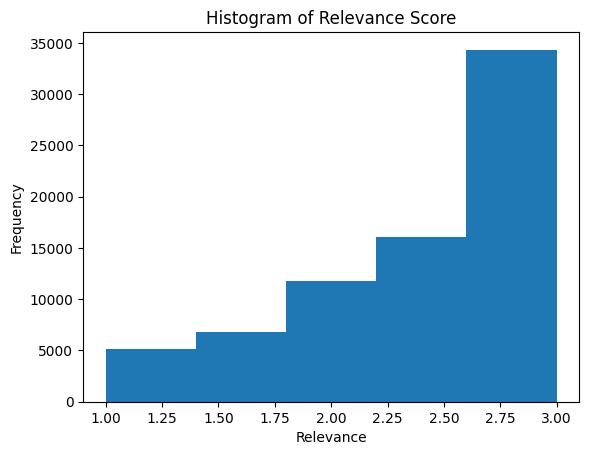

In [3]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named data_frame
# and you want to visualize a column named 'column_name'

# Create a histogram of the column's values
plt.hist(df['relevance'], bins=5)

# Add labels and title
plt.xlabel('Relevance')
plt.ylabel('Frequency')
plt.title('Histogram of Relevance Score')

# Display the plot
plt.show()

In [4]:
from sklearn.model_selection import train_test_split


# Set the training size
training_size = 50000

# Split the DataFrame into training and test sets
train_data, test_data = train_test_split(df, test_size=(len(df) - training_size), random_state=42)

# Display the training data
train_data

# Display the test data
test_data

,id,product_uid,product_title,search_term,relevance
13534,41864,110074,DEWALT 20-Volt Max Lithium-Ion Cordless Combo ...,commercial cordless drill set,3.00
29748,91116,127729,Cerrowire 15 Amp 125-Volt Stay Plugged Replace...,15 Amp Extension Cord,2.67
20225,62389,116912,Broan Allure 2 Series 30 in. Convertible Range...,30 inch under cabinet stainless range hood,2.67
5169,16212,102866,Gardner Bender 1/2 in. Black Polyolefin Heat S...,heat shrink tubing,2.67
49860,151456,156894,Stainless Glide Stainless Steel Strap Rolling ...,stainless steel hardware,2.00
...,...,...,...,...,...
16502,50892,113039,Roberts 360 sq. ft. Felt Cushion Underlayment ...,underlayment for laminate flooring,3.00
54982,166615,165859,Steves &amp; Sons 36 in. x 80 in. Premium 1-Pa...,steves and sons 6panel white,2.33
60036,181204,175353,Sterilite 12 Gal. Latch and Carry Tote (6-Pack),carrrs,2.00
22047,68083,118908,iTouchless Bio-Matic Fingerprint Gold Right Ha...,fingerprint lock,3.00


In [14]:
def check_words(row):
    words_column1 = set(row['product_title'].lower().split())
    words_column2 = set(row['search_term'].lower().split())
    return int(words_column2.issubset(words_column1))

train_data['all_words_in_title'] = train_data.apply(check_words, axis=1)
test_data['all_words_in_title'] = test_data.apply(check_words, axis=1)

train_data

,id,product_uid,product_title,search_term,relevance,all_words_in_title
24891,76418,121965,LG Electronics 26.16 cu. ft. Side by Side Refr...,hickory refrigerator side,2.33,0
57342,173365,170104,MPG 20-1/2 in. H Cast Stone Cherub with Flute ...,granite counter special offers,1.00,0
8779,27292,105664,Patio Living Concepts Catalina Bisque Umbrella...,small outdoor tables,1.67,0
13929,43039,110439,TruAire 10 in. x 6 in. 2-Way Wall/Ceiling Regi...,air vent cover,2.33,0
48541,147368,154589,Stair Parts 4000 3 in. x 66 in. Unfinished Red...,stair newel post,2.33,1
...,...,...,...,...,...,...
37194,113741,137561,Prime-Line 1/4 in. x 8 ft. Stainless Steel Sli...,pocket screens for garage,1.33,0
6265,19679,103542,Aquatic Composite 30 in. x 60 in. x 6 in. Sing...,aquatic shower base,3.00,1
54886,166345,165690,Pleasant Hearth Alpine Medium Glass Fireplace ...,glass and chrome fireplace screen,2.67,0
860,2735,100478,Fiskars 14 ft. Bypass Pruner,pole saws,1.67,0


In [15]:
train_data[train_data['all_words_in_title'] == True]

,id,product_uid,product_title,search_term,relevance,all_words_in_title
48541,147368,154589,Stair Parts 4000 3 in. x 66 in. Unfinished Red...,stair newel post,2.33,1
52453,159323,161440,Everbilt 3-1/2 in. Chrome 5/8 in. Radius Secur...,chrome door hinges,3.00,1
13301,41144,109867,Spectrum Via Vinyl Accordion Door,accordion door,2.33,1
35679,109102,135437,RIDGID 12 in. Sliding Compound Miter Saw with ...,12 compound miter saw,2.67,1
34761,106300,134191,"All Power 3,500-Watt Propane Portable Generator",portable propane generator,2.33,1
...,...,...,...,...,...,...
10627,32812,107326,Aston Aquadica 38 in. x 72 in. Frameless Squar...,glass shower enclosure,3.00,1
3890,12091,102117,Ameriwood 2-Drawer File Cabinet in Black Ebony...,file cabinet,3.00,1
25658,78783,122858,Premier 24 in. 2.97 cu. ft. Freestanding Elect...,24 in electric range,1.67,1
41090,125258,143060,Liberty 10 in. x 10 in. Vintage Inspired Clear...,chevron,1.67,1


In [16]:
train_data['all_words_in_title'].describe()

count    50000.000000
mean         0.175980
std          0.380807
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: all_words_in_title, dtype: float64

In [18]:
import statsmodels.api as sm

# Define the feature and target variables
X = train_data['all_words_in_title']
y = train_data['relevance']

# Add a constant term to the feature variable
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              relevance   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     3469.
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        14:08:44   Log-Likelihood:                -37904.
No. Observations:               50000   AIC:                         7.581e+04
Df Residuals:                   49998   BIC:                         7.583e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.3191      0

In [19]:
from sklearn.metrics import r2_score

X_test = test_data['all_words_in_title']
y_test = test_data['relevance']

X_test = sm.add_constant(X_test)

y_pred = results.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.05855362551006571


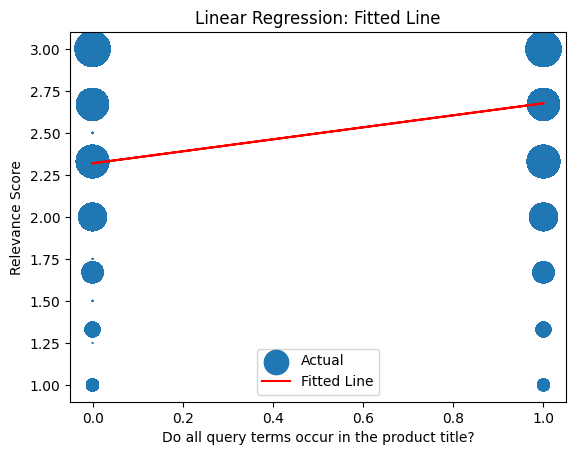

In [38]:
import matplotlib.pyplot as plt
from collections import Counter

weight_counter = Counter(y_test)
weights = [weight_counter[i]/10 for i in y_test]

plt.scatter(test_data['all_words_in_title'], y_test, label='Actual', s=weights)
plt.plot(test_data['all_words_in_title'], y_pred, color='red', label='Fitted Line')
plt.xlabel('Do all query terms occur in the product title?')
plt.ylabel('Relevance Score')
plt.title('Linear Regression: Fitted Line')
plt.legend()
plt.show()